In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline 

In [2]:
# inputs are: mu, sigma, target, revaluation, initial level
# Step1: Get S = R - 0.2 (T-R)
# Step2: Get Payout Ratio = (T-CL)/(CL-S)
# Step3: Move the level: a random move wiht mu and sigma, model as a normal move first then can fit into various models
# Step4: Get size change, use a predetermined two section function to determine, linear or D_size = 50+POR*50
# Step5: Get accumulate PnL and draw the graph

In [3]:
# this defines the stock price movement
def prices_gen(init, daily_return, daily_vol, num):
    prices = [init]
    for i in range(0, num):
        prices.append(prices[-1] + (prices[-1] * (daily_return+(daily_vol*np.random.normal(0,1)))))
    return prices

In [4]:
def size_change_linear(price, target, reval, chg_at_reval):
    s = reval - 0.2 * (target - reval) # when price = reval, por = 0.2
    if s <= price < reval:
        return chg_at_reval*(1-(price - reval)/(s - reval))/10000
    elif reval <= price < target:
        return chg_at_reval*(1-(price - reval)/(target - reval))/10000
    elif price >= target:
        # once the price reaches target, i'll clear my position
        return 0
    else: # once the price drops down to s, i'll clear my position as well
        return 0

In [5]:
# Test the size_change function
target = 100
reval = 80
s = reval - 0.2 * (target - reval)
prices = [i/10 for i in range(750,1010,1)]
size_ch = [size_change(price, target, reval, 500)*10000 for price in prices ]
plt.plot(prices, size_ch)

NameError: name 'size_change' is not defined

In [6]:
def payout_ratio_strategy(target, reval, init_por, daily_return, daily_vol, chg_at_reval, num, size_func): # these three should be prices, for example if they are stocks
    s = reval - 0.2 * (target - reval)
    init = (target + init_por * s)/(1+init_por)
    # por = (target - init) / (init - s)
    prices = prices_gen(init, daily_return, daily_vol, num)
    size_changes = [size_func(price, target, reval, chg_at_reval) for price in prices]
    plt.plot(prices, size_changes)
    pl = [price*size_change for price, size_change in zip(prices, size_changes)]
    return pl

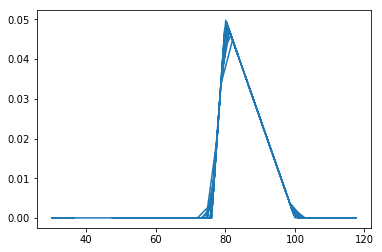

In [11]:
# Test the size_change function
target = 100
reval = 80
init_por = 0.2
daily_return = 0 / 252
daily_vol = 0.30 / (np.sqrt(252))
pl = payout_ratio_strategy(target, reval, init_por, daily_return, daily_vol, 500, 1000, size_change_linear)

In [17]:
def moving_sum_sim(sim_num, target, reval, init_por, daily_return, daily_vol, chg_at_reval, num, size_func):
    pls = [payout_ratio_strategy(target, reval, init_por, daily_return, daily_vol, chg_at_reval, num, size_func) for i in range(sim_num)]
    moving_sums = []
    # for pl in pls:
    #    moving_sums.append([sum(pl[:i]) for i in range(len(pl))])
    for pl in pls:
        total_pl += sum(pl)
    mean_pl = total_pl

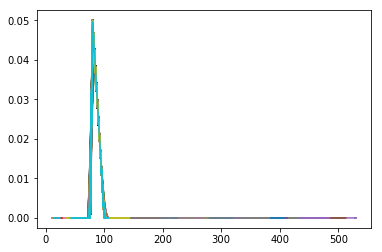

In [18]:
avg_ms = moving_sum_sim(1000, target, reval, init_por, daily_return, daily_vol, 500, 1000, size_change_linear)

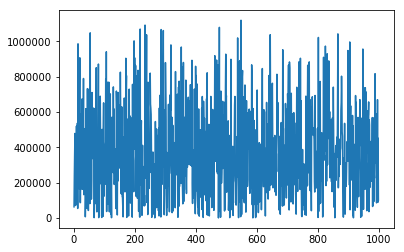

In [20]:
plt.plot(avg_ms)

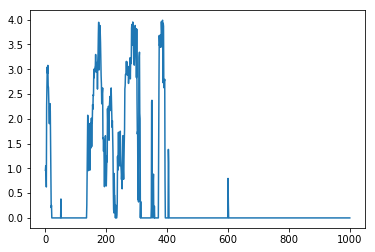

In [12]:
plt.plot(pl)

In [13]:
moving_sum = [sum(pl[:i]) for i in range(len(pl))]

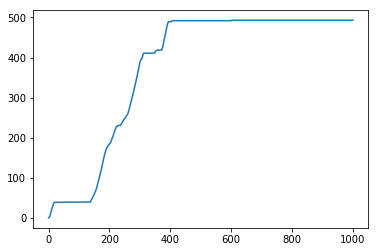

In [14]:
plt.plot(moving_sum)